In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/Machine_Learning/UAS/KlasifikasiUTS.csv'

# Membaca file CSV menjadi sebuah DataFrame
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama untuk memastikan data sudah terbaca
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
target_col = df.select_dtypes(include='int').columns[0]
y = df[target_col]
X = df.drop(columns=[target_col])

X = X.dropna(axis=1, how='all')
X = X.ffill()

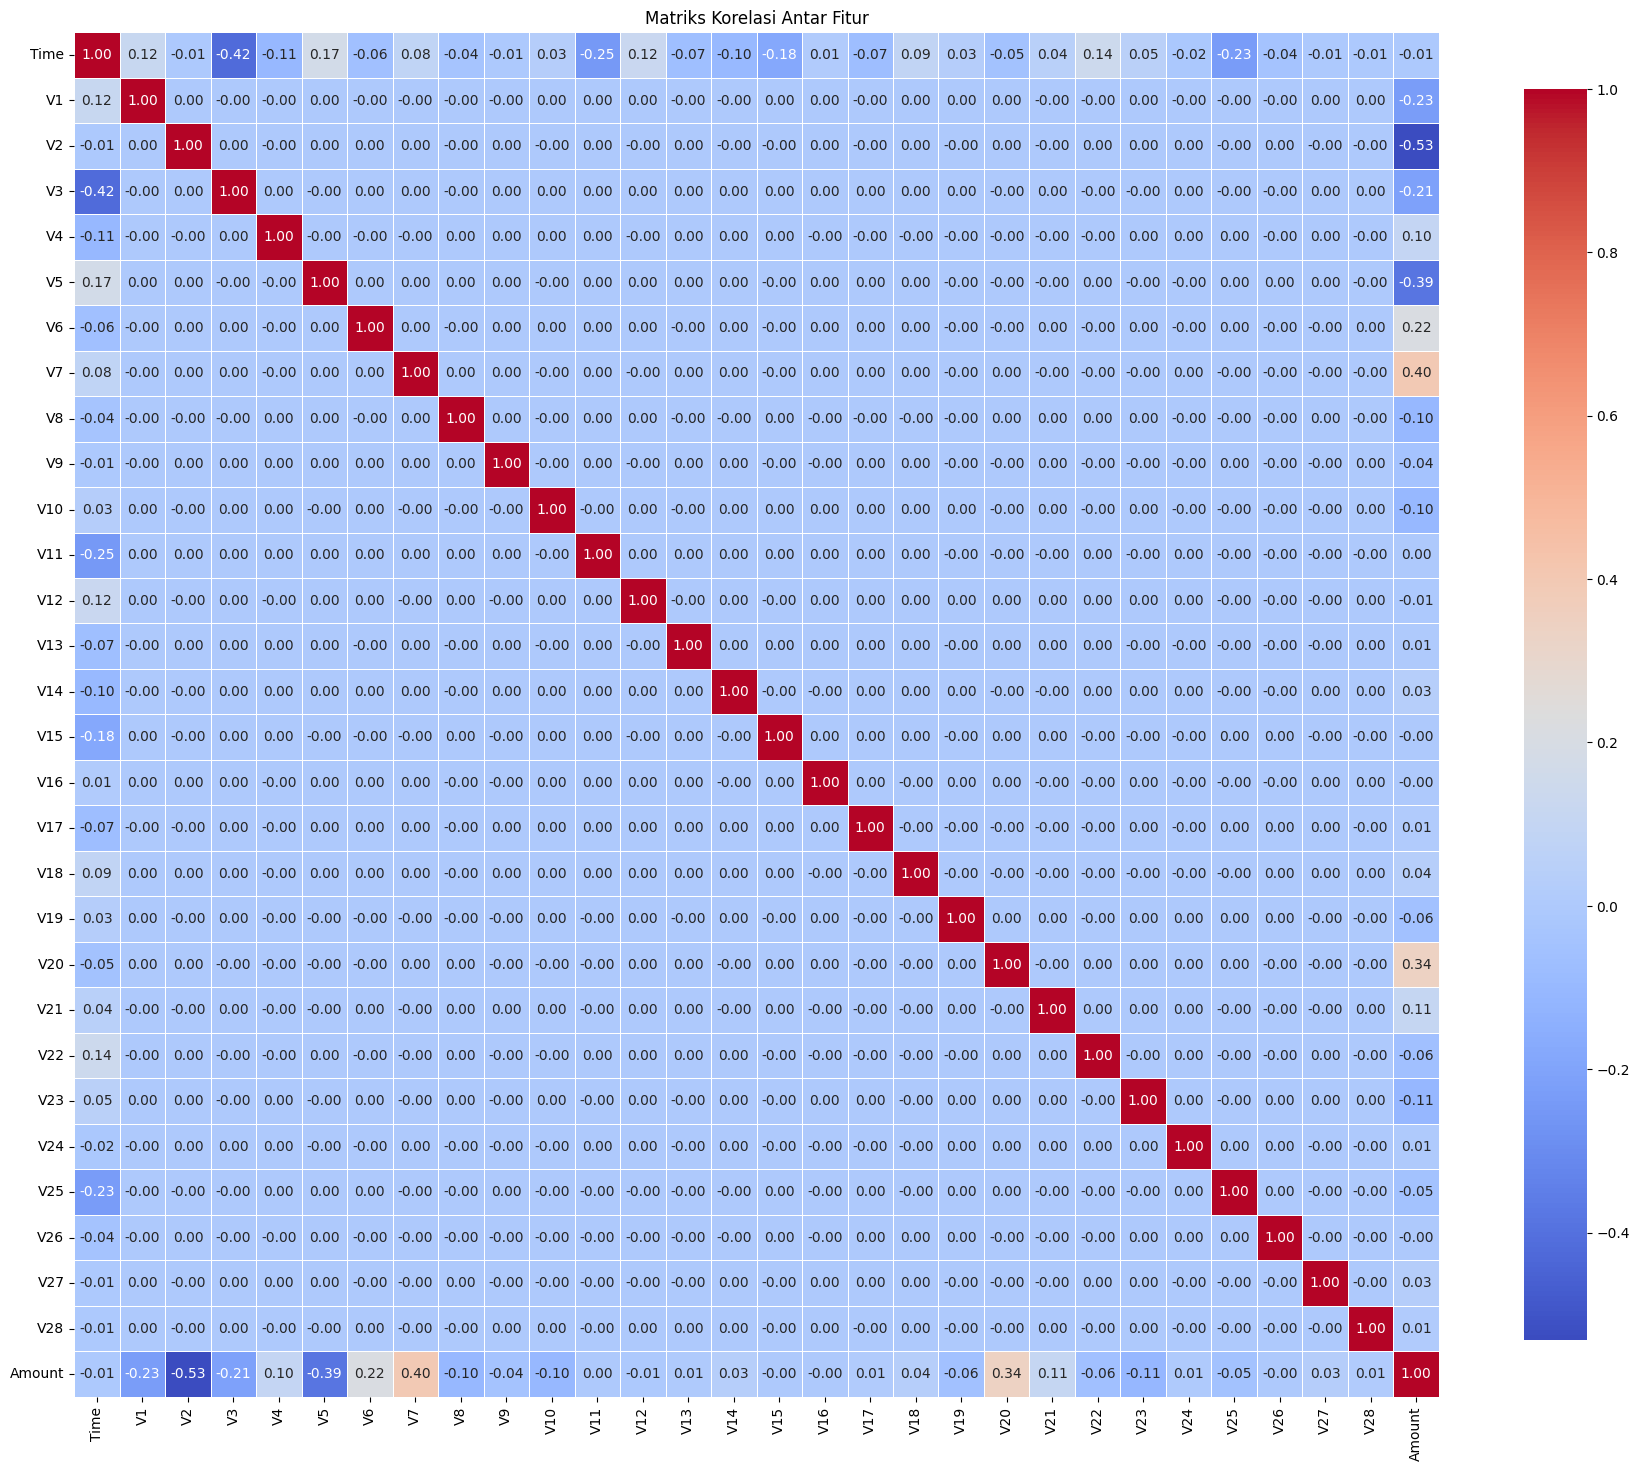

In [ ]:
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Matriks Korelasi Antar Fitur")
plt.tight_layout()
plt.show()

# TensorFlow

In [ ]:
# Identifikasi tipe fitur
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Transform fitur
X_processed = preprocessor.fit_transform(X)

# Normalisasi target
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks, optimizers, regularizers

model_tf = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

model_tf.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)


early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_tf.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_scaled = model_tf.predict(X_test).flatten()
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

Epoch 1/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 67s 9ms/step - AUC: 0.8502 - Precision: 0.0999 - Recall: 0.5651 - accuracy: 0.9739 - loss: 0.0765 - val_AUC: 0.9331 - val_Precision: 0.7315 - val_Recall: 0.8061 - val_accuracy: 0.9992 - val_loss: 0.0107
Epoch 2/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - AUC: 0.9136 - Precision: 0.8330 - Recall: 0.6907 - accuracy: 0.9992 - loss: 0.0041 - val_AUC: 0.9434 - val_Precision: 0.8144 - val_Recall: 0.8061 - val_accuracy: 0.9994 - val_loss: 0.0077
Epoch 3/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - AUC: 0.9420 - Precision: 0.8507 - Recall: 0.7489 - accuracy: 0.9993 - loss: 0.0031 - val_AUC: 0.9434 - val_Precision: 0.8041 - val_Recall: 0.7959 - val_accuracy: 0.9993 - val_loss: 0.0093
Epoch 4/100
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - AUC: 0.9502 - Precision: 0.8647 - Recall: 0.7711 - accuracy: 0.9994 - loss: 0.0030 - val_AUC: 0.9385 - val_Precision: 0.7900 - val_Recall: 0.8061 - val_accuracy: 0.9993 - val_loss: 0.0111
Epoch 5/100
7121

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
=== Classification Report ===
              precision    recall  f1-score   support

         0.0     0.9996    0.9998    0.9997     56864
         1.0     0.8539    0.7755    0.8128        98

    accuracy                         0.9994     56962
   macro avg     0.9268    0.8876    0.9063     56962
weighted avg     0.9994    0.9994    0.9994     56962



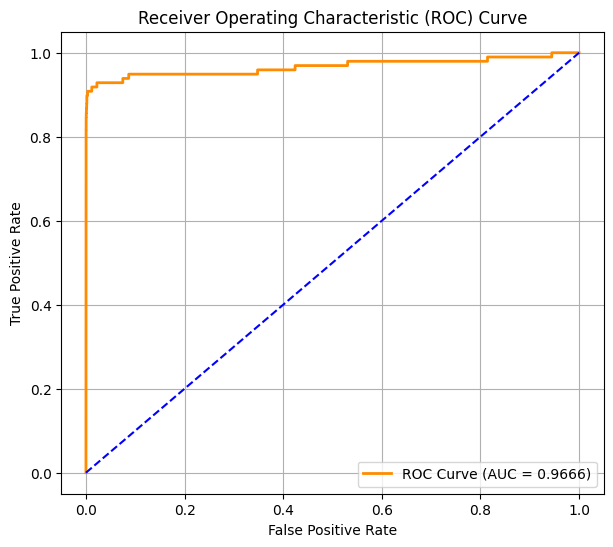

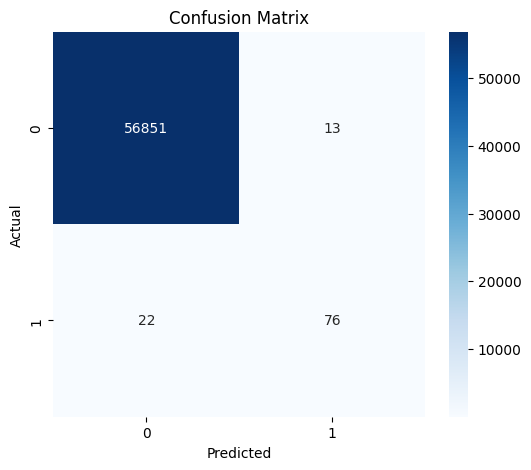

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_pred_probs = model_tf.predict(X_test).flatten()
y_pred_labels = (y_pred_probs > 0.5).astype(int)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred_labels, digits=4))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Torch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Converting to tensor
X_train_tensor = torch.tensor(X_train.toarray() if hasattr(X_train, "toarray") else X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.toarray() if hasattr(X_test, "toarray") else X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class ClassificationNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, 1),
            nn.Sigmoid()  # aktivasi untuk binary classification
        )

    def forward(self, x):
        return self.model(x)

model = ClassificationNN(X_train_tensor.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

Epoch 1/50, Loss: 0.0202
Epoch 2/50, Loss: 0.0035
Epoch 3/50, Loss: 0.0032
Epoch 4/50, Loss: 0.0030
Epoch 5/50, Loss: 0.0030
Epoch 6/50, Loss: 0.0029
Epoch 7/50, Loss: 0.0029
Epoch 8/50, Loss: 0.0027
Epoch 9/50, Loss: 0.0026
Epoch 10/50, Loss: 0.0026
Epoch 11/50, Loss: 0.0025
Epoch 12/50, Loss: 0.0025
Epoch 13/50, Loss: 0.0024
Epoch 14/50, Loss: 0.0023
Epoch 15/50, Loss: 0.0022
Epoch 16/50, Loss: 0.0024
Epoch 17/50, Loss: 0.0022
Epoch 18/50, Loss: 0.0021
Epoch 19/50, Loss: 0.0022
Epoch 20/50, Loss: 0.0022
Epoch 21/50, Loss: 0.0022
Epoch 22/50, Loss: 0.0022
Epoch 23/50, Loss: 0.0021
Epoch 24/50, Loss: 0.0021
Epoch 25/50, Loss: 0.0019
Epoch 26/50, Loss: 0.0020
Epoch 27/50, Loss: 0.0020
Epoch 28/50, Loss: 0.0018
Epoch 29/50, Loss: 0.0020
Epoch 30/50, Loss: 0.0019
Epoch 31/50, Loss: 0.0018
Epoch 32/50, Loss: 0.0019
Epoch 33/50, Loss: 0.0020
Epoch 34/50, Loss: 0.0019
Epoch 35/50, Loss: 0.0018
Epoch 36/50, Loss: 0.0018
Epoch 37/50, Loss: 0.0018
Epoch 38/50, Loss: 0.0017
Epoch 39/50, Loss: 0.

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8681    0.8061    0.8360        98

    accuracy                         0.9995     56962
   macro avg     0.9339    0.9030    0.9179     56962
weighted avg     0.9994    0.9995    0.9994     56962



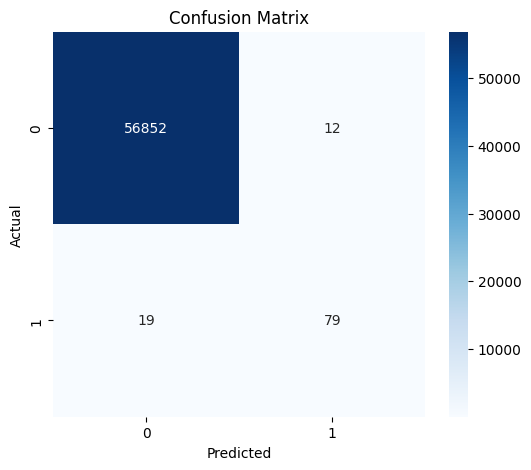

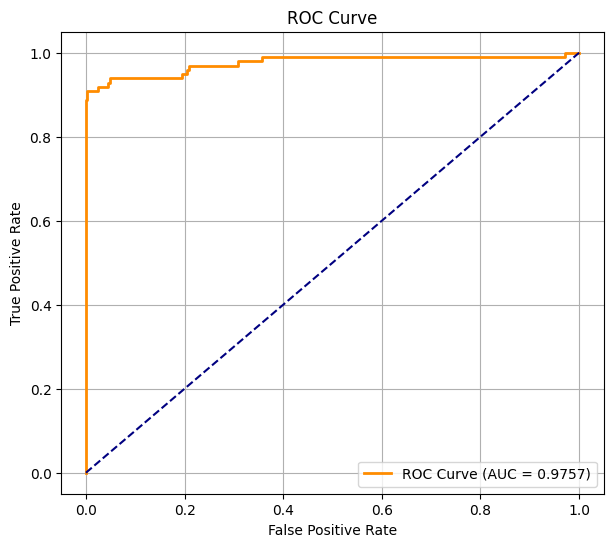

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
model.eval()
with torch.no_grad():
    y_probs = model(X_test_tensor).numpy().flatten()
    y_pred = (y_probs >= 0.5).astype(int)
    y_true = y_test_tensor.numpy().flatten().astype(int)

# Metrik Evaluasi
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Analisis Model: Mengapa Regresi Gagal untuk Klasifikasi Biner?

Dalam analisis ini, kita akan membandingkan dua pendekatan fundamental untuk masalah dengan target biner (0 atau 1): menggunakan model regresi dan menggunakan model klasifikasi. Tujuannya adalah untuk memahami mengapa satu pendekatan gagal total sementara yang lain berhasil dengan baik.

---

## **1. Pendekatan yang Keliru: Model Regresi (TensorFlow & PyTorch)**

Seringkali, pemula mencoba menggunakan arsitektur regresi untuk masalah klasifikasi. Mari kita bedah mengapa ini adalah ide yang buruk.

### Karakteristik Umum Model Regresi

* **Output Layer**: Menggunakan layer `Dense(1)` (di TensorFlow) atau `Linear` (di PyTorch) tanpa fungsi aktivasi. Tujuannya adalah untuk memprediksi nilai numerik kontinu.
* **Loss Function**: Umumnya menggunakan `Mean Squared Error (MSE)` atau `MSELoss`, yang mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual.

### Mengapa Pendekatan Ini Gagal untuk Klasifikasi?

1.  **Mismatch Fundamental**: Model regresi dirancang untuk memprediksi kuantitas (misal: harga rumah, suhu). Target klasifikasi (0 atau 1) adalah label diskrit, bukan kuantitas. Model "dipaksa" untuk memetakan fitur ke nilai numerik yang tidak memiliki interpretasi sebagai kelas.
2.  **Output Tidak Terbatas**: Tanpa aktivasi, output bisa berupa angka apa pun (negatif, atau lebih besar dari 1), yang tidak dapat diartikan sebagai probabilitas kelas.
3.  **Metrik yang Menyesatkan**: Metrik seperti **R² (R-squared)** seringkali bernilai negatif. Ini adalah sinyal bahaya yang berarti performa model lebih buruk daripada sekadar menebak nilai rata-rata dari data target.

> **Intinya**: Menggunakan regresi untuk tugas klasifikasi adalah seperti menggunakan penggaris untuk menimbang berat badan—alat yang salah untuk pekerjaan yang salah.

---

## **2. Pendekatan yang Tepat: Model Klasifikasi Biner (PyTorch)**

Pendekatan yang benar adalah dengan merancang model yang secara eksplisit dibuat untuk tugas klasifikasi.

### Arsitektur Kunci untuk Klasifikasi Biner

* **Output Layer & Aktivasi**: Output `Linear` diikuti oleh fungsi aktivasi **`Sigmoid()`**. Fungsi ini "memaksa" output menjadi nilai antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas keanggotaan kelas 1.
* **Loss Function**: Menggunakan **`Binary Cross-Entropy Loss (BCELoss)`**. Loss function ini secara matematis dirancang untuk mengukur seberapa baik probabilitas yang diprediksi cocok dengan label biner (0 atau 1) yang sebenarnya.
* **Thresholding**: Prediksi akhir dibuat dengan menetapkan ambang batas (biasanya 0.5). Jika probabilitas output ≥ 0.5, sampel diklasifikasikan sebagai kelas 1; jika tidak, sebagai kelas 0.

### Keunggulan Utama Pendekatan Ini

* **Sesuai Konteks**: Model ini memahami sifat biner dari masalah.
* **Output Probabilistik**: Memberikan probabilitas yang dapat diinterpretasikan, yang memungkinkan penyesuaian *threshold* untuk menyeimbangkan *precision* dan *recall*.
* **Evaluasi Komprehensif**: Dapat dievaluasi menggunakan serangkaian metrik yang dirancang khusus untuk klasifikasi.

---

## **3. Metrik Evaluasi yang Wajib Digunakan**

Untuk model klasifikasi, kita tidak bisa hanya melihat akurasi. Metrik berikut memberikan gambaran yang jauh lebih lengkap tentang performa model.

**Contoh Hasil Evaluasi:**
```plaintext
Accuracy:   0.92
Precision:  0.89
Recall:     0.86
F1 Score:   0.87
AUC:        0.93
```
### interpretasi Metrik:

* **Akurasi (Accuracy)**: Dari semua data, berapa persen yang berhasil diprediksi dengan benar? Baik untuk dataset yang seimbang.
* **Presisi (Precision)**: Dari semua yang kita prediksi sebagai "Positif", berapa persen yang benar-benar "Positif"? Metrik ini penting ketika biaya False Positive tinggi.
* **Daya Ingat (Recall/Sensitivity)**: Dari semua kasus "Positif" yang sebenarnya ada, berapa persen yang berhasil kita deteksi? Metrik ini krusial ketika biaya False Negative tinggi.
* **Skor F1 (F1-Score)**: Rata-rata harmonik dari Presisi dan Recall. Memberikan satu angka yang menyeimbangkan kedua metrik tersebut.
* **AUC (Area Under ROC Curve)**: Mengukur kemampuan agregat model untuk membedakan antara kelas positif dan negatif di semua kemungkinan threshold. Nilai mendekati 1.0 menunjukkan model pemisah yang sangat baik.
---
**Kesimpulan: Model Pilihan Utama**

Rekomendasi Terbaik: Model Klasifikasi PyTorch dengan `Sigmoid` dan `BCELoss`.

**Alasan:**

Model ini tidak hanya secara fundamental benar untuk tugas klasifikasi biner, tetapi juga memberikan output yang dapat diinterpretasikan (probabilitas) dan dapat dievaluasi secara menyeluruh dengan metrik yang relevan seperti Precision, Recall, dan AUC. Ini memastikan kita memahami secara mendalam kekuatan dan kelemahan model, bukan sekadar melihat angka performa yang dangkal.